# SVM is one of the most popular algorithms, 
which were asked in the data scientist interviews (the other ones are Linear Regiression, Naive Bayes and Random Forest). You might want to know all the details in this Jupyter notebook by heart.

Although we can use scikit-learn package to call the algorithms for model training and prediction, we need to understand the theoretical fundamentals of each algorithm, how and why we use this specific algorithm for machine learning. 

# Method one

The codes and functions are adaptive from this data science blog post:

http://ecomunsing.com/build-your-own-support-vector-machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
from cvxpy import *
% matplotlib inline

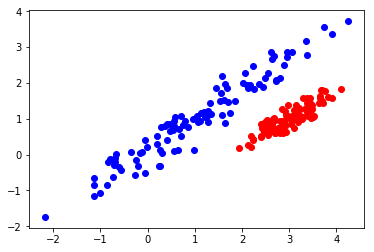

In [2]:
#like what we have done in the logistic regression section, we generate a simulated dataset for experiment:

# Define the two sets 
d = 2   # Dimension of problem. We'll leave at 2 for now.
m = 100 # Number of points in each class
n = 100  

x_center = [1,1]  # E.g. [1,1]
y_center = [3,1]  # E.g. [2,2]

# Set a seed which will generate feasibly separable sets
#  Note: these may only be separable with the default tutorial settings
np.random.seed(8)  

# Define random orientations for the two clusters
orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)

# Generate unit-normal elements, but clip outliers.
rx = np.clip(np.random.randn(m,d),-2,2)
ry = np.clip(np.random.randn(n,d),-2,2)
x = x_center + np.dot(rx,orientation_x)
y = y_center + np.dot(ry,orientation_y)

# Check out our clusters!
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')

In [3]:
## OPTIMIZATION- in CvxPy!

a = Variable(d)
b = Variable()
t = Variable()

obj = Maximize(t)

x_constraints = [a.T * x[i] - b >= t  for i in range(m)]
y_constraints = [a.T * y[i] - b <= -t for i in range(n)]

constraints = x_constraints +  y_constraints + [norm(a,2) <= 1]

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)

Problem Status: optimal


In [4]:
## Define a helper function for plotting the results, the decision plane, and the supporting planes

def plotClusters(x,y,a,b,t):
    # Takes in a set of datapoints x and y for two clusters,
    #  the hyperplane separating them in the form a'x -b = 0,
    #  and a slab half-width t
    d1_min = np.min([x[:,0],y[:,0]])
    d1_max = np.max([x[:,0],y[:,0]])
    # Line form: (-a[0] * x - b ) / a[1]
    d2_atD1min = (-a[0]*d1_min + b ) / a[1]
    d2_atD1max = (-a[0]*d1_max + b ) / a[1]

    sup_up_atD1min = (-a[0]*d1_min + b + t ) / a[1]
    sup_up_atD1max = (-a[0]*d1_max + b + t ) / a[1]
    sup_dn_atD1min = (-a[0]*d1_min + b - t ) / a[1]
    sup_dn_atD1max = (-a[0]*d1_max + b - t ) / a[1]

    # Plot the clusters!
    plt.scatter(x[:,0],x[:,1],color='blue')
    plt.scatter(y[:,0],y[:,1],color='red')
    plt.plot([d1_min,d1_max],[d2_atD1min[0,0],d2_atD1max[0,0]],color='black')
    plt.plot([d1_min,d1_max],[sup_up_atD1min[0,0],sup_up_atD1max[0,0]],'--',color='gray')
    plt.plot([d1_min,d1_max],[sup_dn_atD1min[0,0],sup_dn_atD1max[0,0]],'--',color='gray')
    plt.ylim([np.floor(np.min([x[:,1],y[:,1]])),np.ceil(np.max([x[:,1],y[:,1]]))])

In [5]:
# Typecast and plot these initial results

if type(a) == cvxpy.expressions.variable.Variable: # These haven't yet been typecast
    a = a.value
    b = b.value
    t = t.value

#plotClusters(x,y,a,b,t)

(-1.0, 3.0)

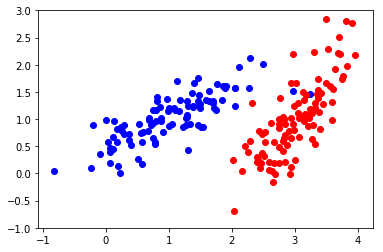

In [6]:
## Generate data- this time, it can overlap!
# Relies on the centerpoints defined above
np.random.seed(2) #2 works well 

orientation_x = np.random.rand(2,2)
orientation_y = np.random.rand(2,2)

x = x_center + np.dot(np.random.randn(m,d),orientation_x)
y = y_center + np.dot(np.random.randn(n,d),orientation_y)

# Check out our clusters!
ax = plt.subplot(111)
plt.scatter(x[:,0],x[:,1],color='blue')
plt.scatter(y[:,0],y[:,1],color='red')
ax.set_ylim([np.floor(np.min([x[:,1],y[:,1]])),np.ceil(np.max([x[:,1],y[:,1]]))])

Problem Status: optimal


IndexError: invalid index to scalar variable.

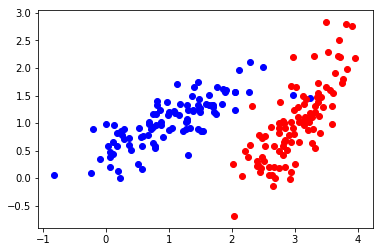

In [7]:
## OPTIMIZATION- in CvxPy!

a = Variable(d)
b = Variable()
u = Variable(m)
v = Variable(n)

obj = Minimize(np.ones(m)*u + np.ones(n)*v)

x_constraints = [a.T * x[i] - b >= 1 - u[i]  for i in range(m)]
y_constraints = [a.T * y[i] - b <= -1 + v[i] for i in range(n)]
u_constraints = [u[i] >= 0  for i in range(m)]
v_constraints = [v[i] >= 0  for i in range(n)]

constraints = x_constraints +  y_constraints + u_constraints + v_constraints

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)
plotClusters(x,y,a.value,b.value,1)

Problem Status: optimal


IndexError: invalid index to scalar variable.

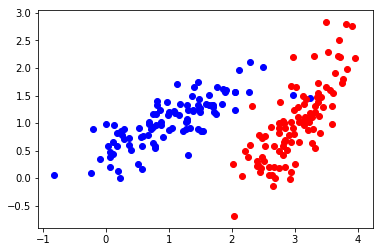

In [8]:
## Optimization- just a few modifications to our previous problem!

gamma = Parameter()
gamma.value = 0.4

obj = Minimize(norm(a,2) + gamma*(np.ones(m)*u + np.ones(n)*v) )
constraints = x_constraints +  y_constraints + u_constraints + v_constraints

prob = Problem(obj, constraints)

prob.solve()
print("Problem Status: %s"%prob.status)
## Plotting the results
plotClusters(x,y,a.value,b.value,1)

IndexError: invalid index to scalar variable.

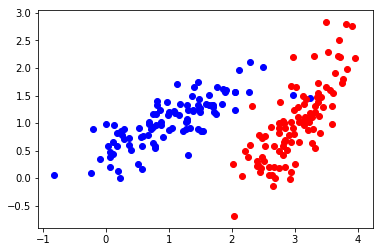

In [9]:
# We can change the value of Gamma around a bit
gamma.value = 0.05
prob.solve()
plotClusters(x,y,a.value,b.value,1)

# Method 2 : use the SVM function from sklearn package

In [10]:
data   = np.vstack([x,y])
labels = np.vstack([ np.zeros([m,1]), np.ones([n,1]) ]).ravel()

In [11]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1-0.05)
clf.fit(data,labels)

SVC(C=0.95, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

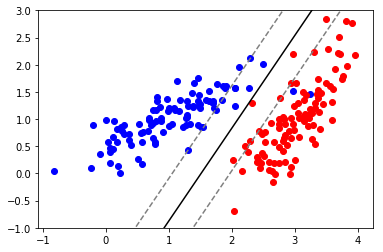

In [12]:
a1 = -np.matrix(clf.coef_).T
b1 = clf.intercept_
plotClusters(x,y,a1,b1,1)